**Задача 2**

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy.stats import skew
from statsmodels.distributions.empirical_distribution import ECDF

**а) Определить по выборке моду, медиану, размах, оценку коэффициента асимметрии**

In [2]:
n = 25
sample = np.random.exponential(scale=1, size=n)

print(sample)

# Подсчет моды
mode = sample[np.argmax(np.bincount(sample.astype(int)))]
print(f"Mode: {mode:.2f}")

# Подсчет медианы
median = np.median(sample)
print(f"Median: {median:.2f}")

# Подсчет размаха
range_ = np.ptp(sample)
print(f"Range: {range_:.2f}")

# Подсчет оценки коэффициента асимметрии
skewness = skew(sample)
print(f"Skewness: {skewness:.2f}")

[1.46668855 0.6478589  1.00276754 0.98690684 0.05529544 0.63580809
 0.89853789 0.22081661 1.12900581 0.82886113 0.03798355 3.59219144
 0.26339746 1.14106903 1.91419038 0.08671996 0.0550909  2.00280732
 3.21084749 0.66154664 1.9038134  3.04277446 0.37606451 0.95080351
 0.17560119]
Mode: 1.47
Median: 0.90
Range: 3.55
Skewness: 1.12


**Построить эмпирическую функцию распределения, гистограмму и boxplot**


Text(0.5, 1.0, 'Эмпирическая функция распределения')

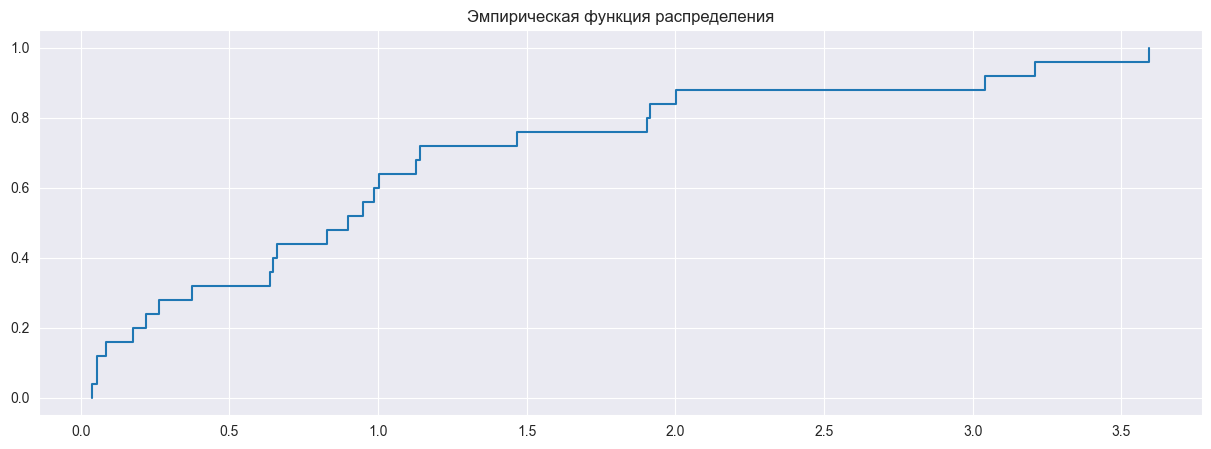

In [3]:
plt.figure(figsize=(15, 5))

# Эмпирическая функция распределения
plt.subplot(1, 1, 1)
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, where="post")
plt.title("Эмпирическая функция распределения")

Text(0.5, 1.0, 'Гистограмма')

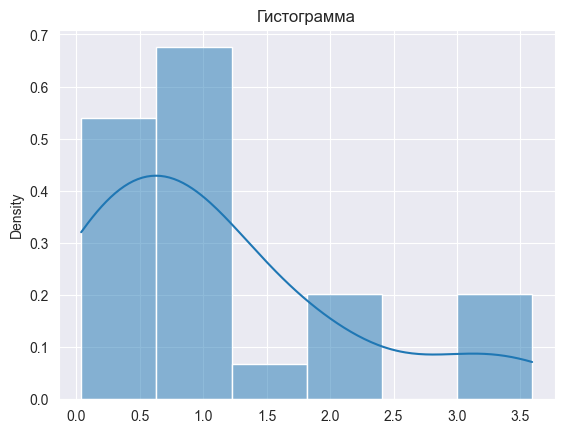

In [4]:
# Гистограмма

n = len(sample)
k = int(math.ceil(1 + np.log2(n)))

sns.histplot(sample, bins=k, stat='density', kde=True)
plt.title("Гистограмма")


Text(0.5, 1.0, 'Boxplot')

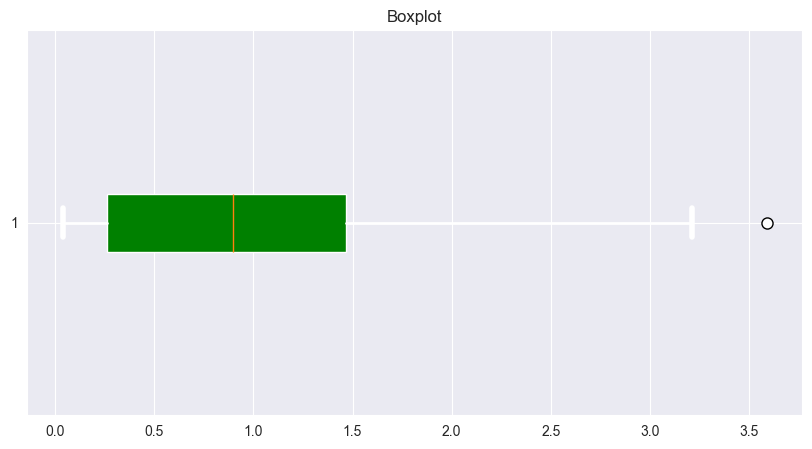

In [5]:
from matplotlib.ticker import AutoMinorLocator

# Boxplot

_, axs = plt.subplots(1, 1, figsize=(10, 5))

# Заголовок
axs.set_title("Boxplot")
order_statistics = sorted(sample)

# Построение boxplot
plt.boxplot(x=order_statistics,
            vert=False,
            patch_artist=True,  # Заливка ящика цветом
            boxprops={"facecolor": "green", "color": "white", "linewidth": 1},  # Свойства ящика
            whiskerprops={"color": "white", "linewidth": 2},  # Свойства усов
            capprops={"color": "white", "linewidth": 4},  # Свойства "шапок" усов
            flierprops={'markerfacecolor': 'white', 'markersize': 8})  # Свойства выбросов

plt.title('Boxplot')

**с) Сравнить оценку плотности распределения среднего арифметического элементов выборки, полученную с помощью ЦПТ, с бутстраповской оценкой плотности**

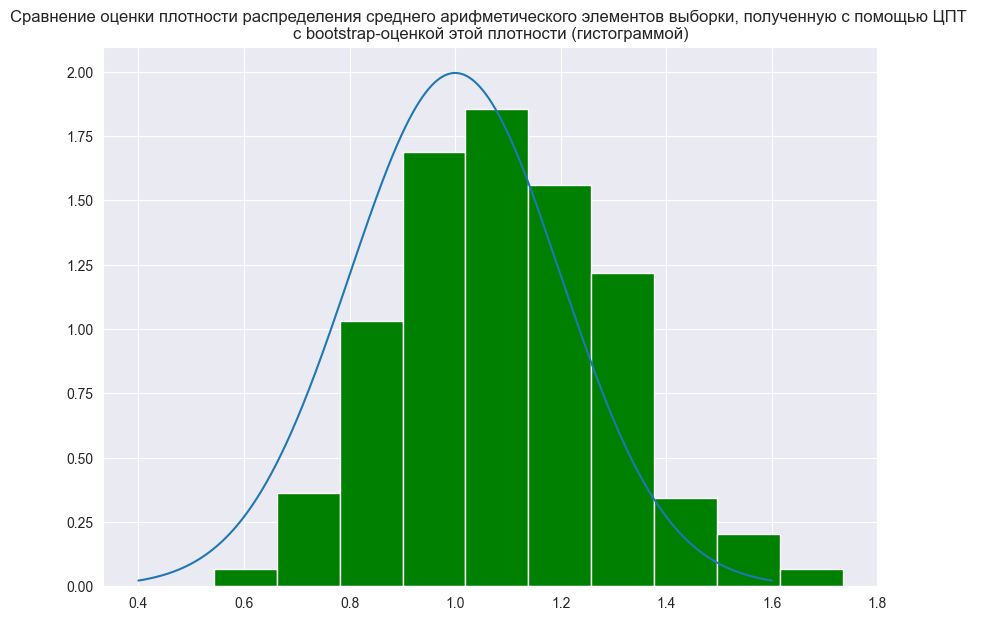

In [6]:
from scipy.stats import norm

_, axs = plt.subplots(1, 1, figsize=(10, 7))
bootstrap_means = [np.mean(np.random.choice(sample, size=n, replace=True)) for _ in range(1000)]

axs.set_title("Сравнение оценки плотности распределения среднего арифметического элементов выборки, полученную с помощью ЦПТ \nс bootstrap-оценкой этой плотности (гистограммой)")

axs.hist(bootstrap_means,
          bins=1+int(np.log2(1000)),
          color='green',
          density=True)
# подсчеты можно увидеть (в файлике task_2_c)
mu = 1
sigma = 1/5
x = np.linspace(mu + 3 * sigma, mu - 3 * sigma, 1000)
y = norm.pdf(x, mu, sigma)
plt.plot(x, y, label='Нормальное распределение')
plt.show()


**d) Найти бутстраповскую оценку плотности распределения коэффициента асимметрии и оценить вероятность того, что коэффициент асимметрии будет меньше 1.**

prob_skew_less_than_1: 0.45


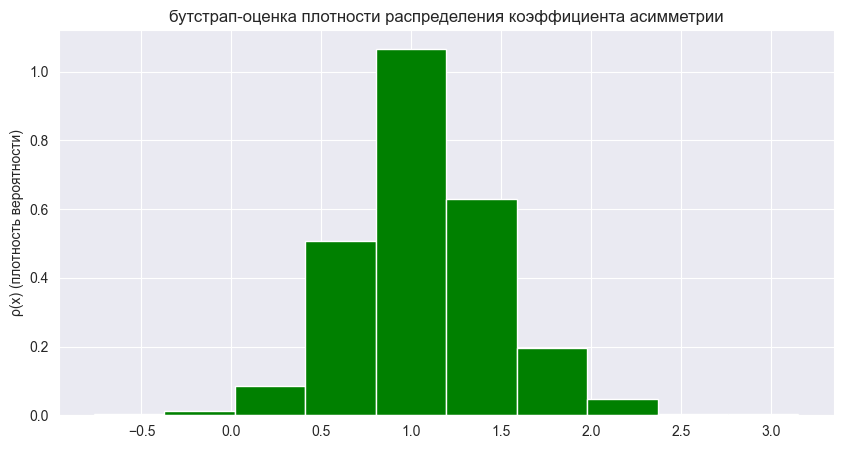

In [7]:
_, axs = plt.subplots(1, 1, figsize=(10, 5))
axs.set_title("бутстрап-оценка плотности распределения коэффициента асимметрии")
axs.set_ylabel("ρ(x) (плотность вероятности)")
bootstrap_skewness = [skew(np.random.choice(sample, size=n, replace=True)) for _ in range(1000)]
axs.hist(bootstrap_skewness,
         bins=1 + int(np.log2(1000)),
         color='green',
         density=True)
prob_skew_less_than_1 = np.sum([1 if bootstrap_skewness[i] < 1 else 0 for i in range(1000)]) / 1000
print(f"prob_skew_less_than_1: {prob_skew_less_than_1:.2f}")
plt.show()

**e) Сравнить плотность распределения медианы выборки с бутстраповской оценкой этой плотности**

In [8]:
def p(x: float) -> float:
    return np.exp(-x) if x >= 0 else 0

def F(x: float) -> float:
    return (1 - np.exp(-x)) if x >= 0 else 0

def Kappa(x):
    k = n // 2 + 1
    return n * p(x) * sp.special.comb(n - 1, k - 1) * ((1 - F(x)) ** (n - k)) * (F(x) ** (k - 1))

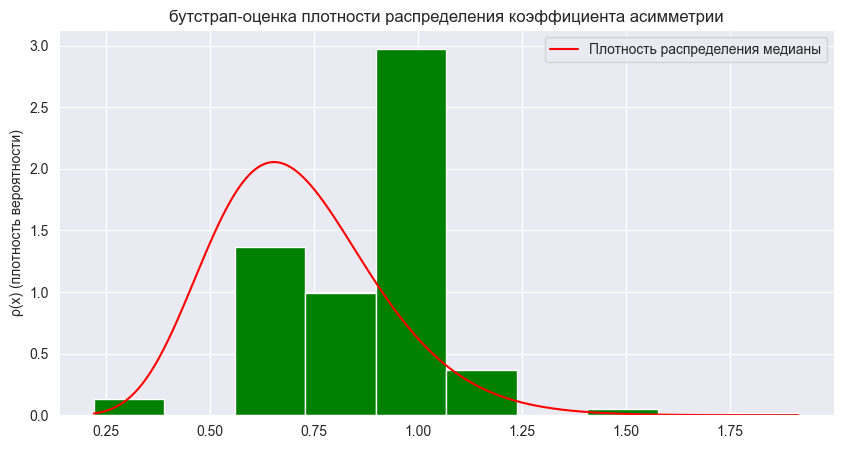

In [9]:
_, axs = plt.subplots(1, 1, figsize=(10, 5))

axs.set_title("бутстрап-оценка плотности распределения коэффициента асимметрии")
axs.set_ylabel("ρ(x) (плотность вероятности)")

bootstrap_medians = [np.median(np.random.choice(sample, size=n, replace=True)) for _ in range(1000)]


axs.hist(bootstrap_medians,
         bins=int(1 + np.log2(1000)),
         color="green",
         density=True)

x = np.linspace(min(bootstrap_medians),
                max(bootstrap_medians),
                1000)
axs.plot(x,
         [Kappa(x_i) for x_i in x],
         label="Плотность распределения медианы",
         color = "red")
plt.legend()
plt.show()